In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
import os
print(os.getcwd())  # current directory
print(os.listdir())  # files in the current directory


d:\uni\sem4\ml\projectmidesm\heartattackfinal
['app.py', 'framingham.csv', 'Heart Disease Prediction.ipynb', 'req.txt', 'templates']


## Data PreprPreprocessing 

In [3]:
disease = pd.read_csv("framingham.csv")

In [4]:
disease

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### Renaming the male column to Sex_male to know that 1 is male and 0 is female

In [5]:
disease.rename(columns={'male' : 'Sex_male'}, inplace = True)

In [6]:
disease

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### As Heart disease is not related to the persons education so we will remove the education columnn from the dataframe

In [7]:
disease=disease.drop("education",axis=1)

In [8]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


### Handling the missing values

In [9]:
disease.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
disease['cigsPerDay'].skew()

np.float64(1.2470523561848126)

In [11]:
#As the skew of cigsPerDay is greater than 0 so we fill the null value of totChol with median
disease['cigsPerDay'] = disease['cigsPerDay'].fillna(disease['cigsPerDay'].mean())

In [12]:
disease['totChol'].skew()

np.float64(0.8718805634765354)

In [13]:
#As the skew is 0.87 which is greater than 0 so we fill the null value of totChol with median
disease['totChol']=disease['totChol'].fillna(disease['totChol'].mean())

In [14]:
#As the BPMeds is in binary form so we use mode to fill the null values
disease['BPMeds']=disease['BPMeds'].fillna(disease['BPMeds'].mode()[0])


In [15]:
disease['BMI'].skew()

np.float64(0.9821832986950597)

In [16]:
#As the skew is 0.98 which is greater than 0 so we fill the null value of BMI with median
disease['BMI']=disease['BMI'].fillna(disease['BMI'].median())

In [17]:
disease['glucose'].skew()

np.float64(6.2149483495346765)

In [18]:
#As the skew is 6.214 which is highly greater than 0 so we fill the null value of glucose with median
disease['glucose']=disease['glucose'].fillna(disease['glucose'].median())

In [19]:
disease.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

### Making a Bar Plot to Count people affected by CHD

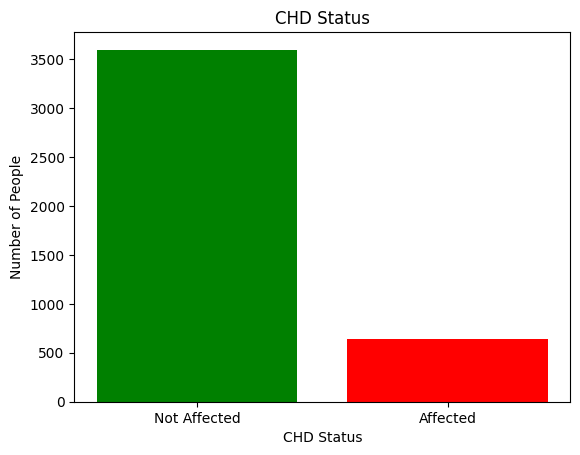

In [20]:
counts = disease["TenYearCHD"].value_counts()

plt.bar(["Not Affected", "Affected"], counts, color=["green", "red"])
plt.title("CHD Status")
plt.ylabel("Number of People")
plt.xlabel("CHD Status")
plt.show()

### Spliting the data

In [21]:
X = np.asarray(disease[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit_transform(X)

# Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=4)

print(f"Train set: {X_train.shape} {y_train.shape}")
print(f"Test set: {X_test.shape} {y_test.shape}")

Train set: (2968, 6) (2968,)
Test set: (1272, 6) (1272,)


In [22]:
# As you can see from the barplot there is a bias in data so we use smote to 
# Handle class imbalance with SMOTE (Oversampling the minority class) 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Train set: {X_resampled.shape} {y_resampled.shape}")
print(f"Test set: {X_test.shape} {y_test.shape}")

Train set: (5024, 6) (5024,)
Test set: (1272, 6) (1272,)


### Fitting Logistic Regresssion Model for Heart Disease Prediction 

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_resampled,y_resampled)
y_pred = model.predict(X_test)

### Checking the Accuracy of the model

In [24]:
score_lr=round(accuracy_score(y_test,y_pred)*100,2)
roc_lr= round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100,2)
print("Accuracy of the model is =",score_lr)
print("ROC-AUC Score:",roc_lr)

Accuracy of the model is = 66.04
ROC-AUC Score: 72.08


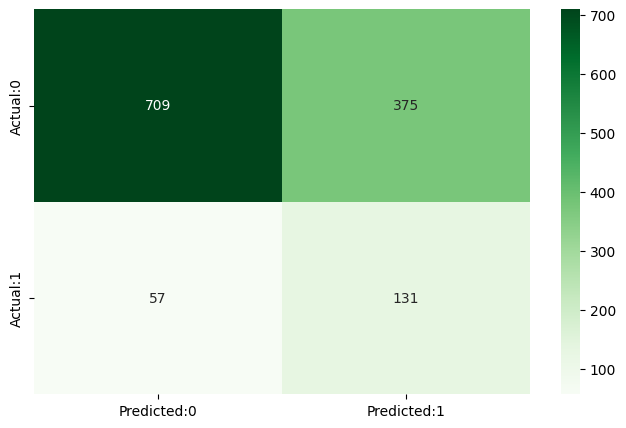

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1084
           1       0.26      0.70      0.38       188

    accuracy                           0.66      1272
   macro avg       0.59      0.68      0.57      1272
weighted avg       0.83      0.66      0.71      1272



In [25]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

### Fitting Random Forest Clasifier for Heart Disease Prediction

In [ ]:
model_RFC = RandomForestClassifier(class_weight='balanced', random_state=42)
model_RFC.fit(X_resampled, y_resampled)

# Evaluate
y_pred = model_RFC.predict(X_test)

print(classification_report(y_test, y_pred))

score_rf = round(accuracy_score(y_test,y_pred)*100,2)
roc_rf = round( roc_auc_score(y_test, model_RFC.predict_proba(X_test)[:, 1])*100,2)

print("Accuracy of the model: ",score_rf)
print("ROC-AUC Score:",roc_rf)
import pickle



              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1084
           1       0.27      0.28      0.28       188

    accuracy                           0.78      1272
   macro avg       0.57      0.57      0.57      1272
weighted avg       0.79      0.78      0.79      1272

Accuracy of the model:  78.46
ROC-AUC Score: 68.62


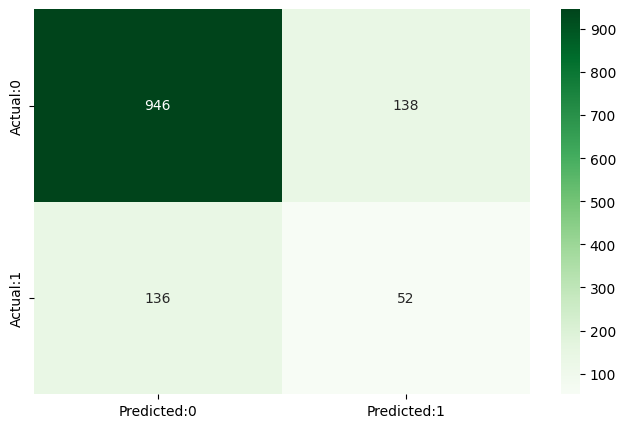

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1084
           1       0.27      0.28      0.28       188

    accuracy                           0.78      1272
   macro avg       0.57      0.57      0.57      1272
weighted avg       0.79      0.78      0.79      1272



In [28]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))


### Fitting SVC while using gaussian rbf kernel for Heart Disease Prediction

In [29]:
# Train the SVC model with class weights
svc = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svc.fit(X_resampled, y_resampled)

# Make predictions and evaluate the model
y_pred = svc.predict(X_test)

# Evaluate performance
roc_svc_rbf = round(roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])*100,2)
score_svc_rbf = round(accuracy_score(y_test,y_pred)*100,2)


print(classification_report(y_test, y_pred))
print("Acurracy of the model is :",score_svc_rbf)
print("ROC-AUC Score:",roc_svc_rbf)


              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1084
           1       0.25      0.61      0.35       188

    accuracy                           0.67      1272
   macro avg       0.58      0.65      0.57      1272
weighted avg       0.81      0.67      0.72      1272

Acurracy of the model is : 67.3
ROC-AUC Score: 69.62


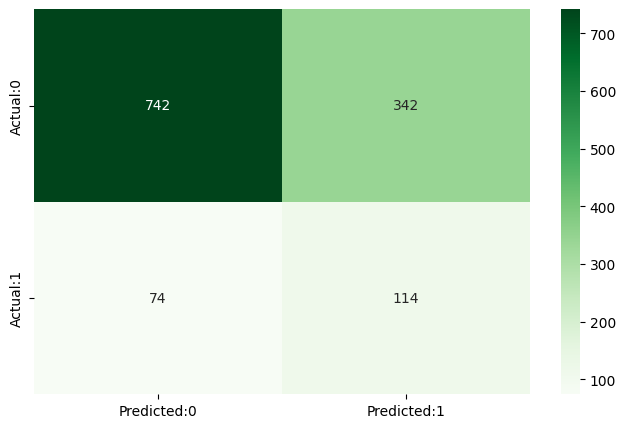

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1084
           1       0.25      0.61      0.35       188

    accuracy                           0.67      1272
   macro avg       0.58      0.65      0.57      1272
weighted avg       0.81      0.67      0.72      1272



In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

### Fitting SVC while using linear kernel for Heart Disease Prediction

In [31]:
# Train the model
linear_svc_model=SVC(kernel="linear", class_weight="balanced", probability=True)
linear_svc_model.fit(X_resampled,y_resampled)

# Make predictions and evaluate the model
y_pred = linear_svc_model.predict(X_test)

# Evaluate the model
score_linearsvc = round(accuracy_score(y_test,y_pred)*100,2)
roc_linearsvc = round(roc_auc_score(y_test, linear_svc_model.predict_proba(X_test)[:, 1])*100,2)
print(classification_report(y_test, y_pred))
print("Acurracy of the model is :",score_linearsvc)
print("ROC-AUC Score:", roc_linearsvc)

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1084
           1       0.25      0.68      0.36       188

    accuracy                           0.65      1272
   macro avg       0.58      0.66      0.56      1272
weighted avg       0.82      0.65      0.70      1272

Acurracy of the model is : 65.02
ROC-AUC Score: 71.88


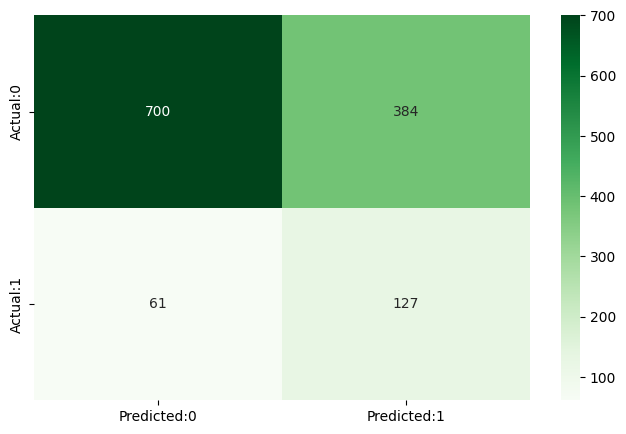

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1084
           1       0.25      0.68      0.36       188

    accuracy                           0.65      1272
   macro avg       0.58      0.66      0.56      1272
weighted avg       0.82      0.65      0.70      1272



In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

In [33]:
# Train the model
poly_svc_model=SVC(kernel="poly", degree=4, coef0=1, class_weight="balanced", probability=True)
poly_svc_model.fit(X_resampled,y_resampled)

# Make predictions and evaluate the model
y_train_predict =poly_svc_model.predict(X_resampled)
y_pred = poly_svc_model.predict(X_test)

# Evaluate the model
score_polysvc = round(accuracy_score(y_test,y_pred)*100,2)
roc_polysvc = round(roc_auc_score(y_test,poly_svc_model.predict_proba(X_test)[:,-1])*100,2)

print(classification_report(y_test, y_pred))
print("Acurracy of the model is :",score_polysvc)
print("ROC-AUC Score:", roc_polysvc)
print("Acurracy of the model on training is :",accuracy_score(y_resampled,y_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1084
           1       0.23      0.54      0.32       188

    accuracy                           0.67      1272
   macro avg       0.56      0.61      0.55      1272
weighted avg       0.80      0.67      0.71      1272

Acurracy of the model is : 66.9
ROC-AUC Score: 65.19
Acurracy of the model on training is : 0.7231289808917197


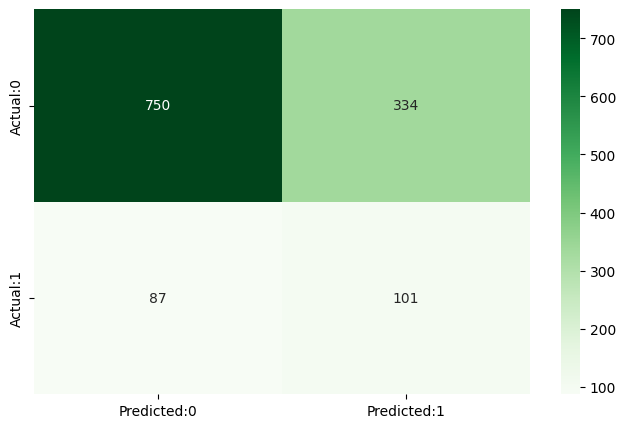

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1084
           1       0.23      0.54      0.32       188

    accuracy                           0.67      1272
   macro avg       0.56      0.61      0.55      1272
weighted avg       0.80      0.67      0.71      1272



In [34]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

### Final Output

In [35]:
scores= [score_lr,score_linearsvc,score_polysvc,score_rf,score_svc_rbf]
rocs = [roc_lr,roc_linearsvc,roc_polysvc,roc_rf,roc_svc_rbf]
algorithms = ["Logistic Regression","LinearSVC","Polynomial SVC","Random Forest", "Gaussian RBF SVC"]

for i in range(len(algorithms)):
    print(f"The Accuracy and ROC score achieved using {algorithms[i]} is: {scores[i]}% and {rocs[i]}%")

The Accuracy and ROC score achieved using Logistic Regression is: 66.04% and 72.08%
The Accuracy and ROC score achieved using LinearSVC is: 65.02% and 71.88%
The Accuracy and ROC score achieved using Polynomial SVC is: 66.9% and 65.19%
The Accuracy and ROC score achieved using Random Forest is: 78.46% and 68.62%
The Accuracy and ROC score achieved using Gaussian RBF SVC is: 67.3% and 69.62%


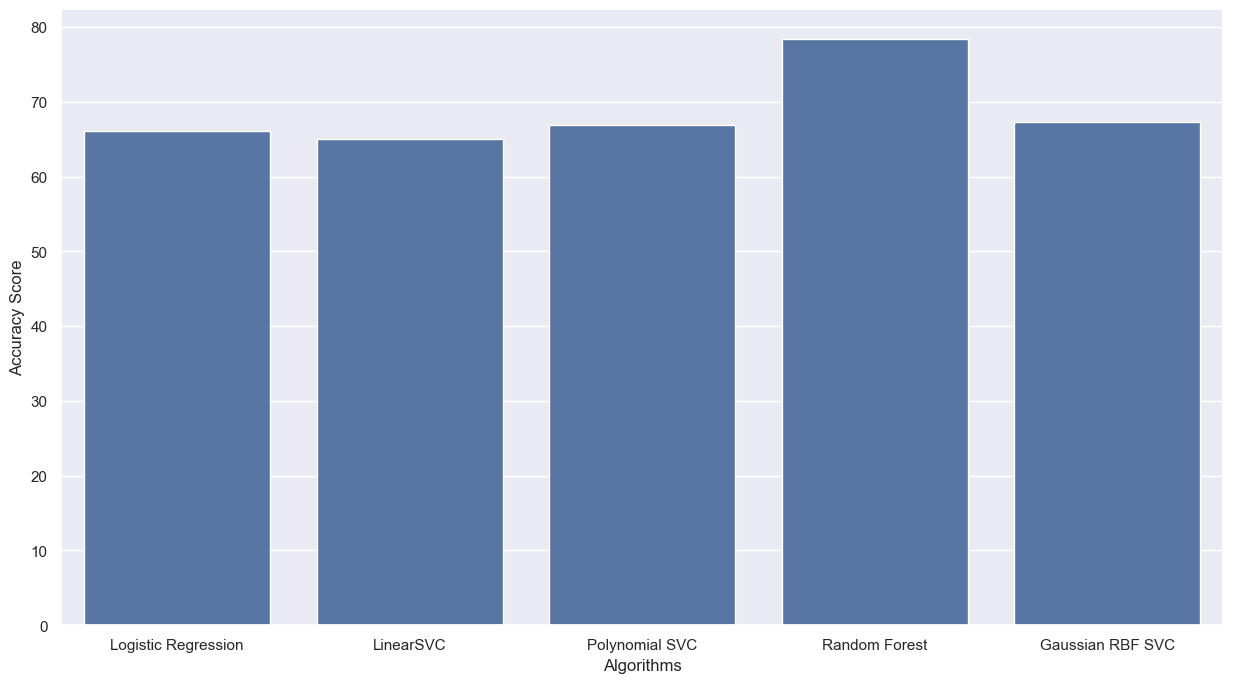

In [36]:
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

# Explicitly specify x and y
sns.barplot(x=algorithms, y=scores)
plt.show()